In [1]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/demyank/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /home/demyank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [3]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [4]:
from gensim.models.word2vec import Word2Vec

In [5]:
model = Word2Vec(sentences)

In [6]:
model.init_sims(replace=True)

In [7]:
model.wv.similarity('fruit', 'apple')

0.82426816

In [8]:
model.wv.similarity('he', 'she')

0.8637486

In [9]:
model.wv.similarity('fruit', 'he')

0.17666441

In [10]:
model.wv.most_similar('home')

[('door', 0.8199310302734375),
 ('back', 0.8040640354156494),
 ('hotel', 0.7891431450843811),
 ('store', 0.776621401309967),
 ('hospital', 0.7747287750244141),
 ('station', 0.7701011300086975),
 ('party', 0.7575642466545105),
 ('head', 0.7551870346069336),
 ('house', 0.7442201972007751),
 ('seat', 0.7307567000389099)]

In [11]:
model.wv.most_similar(positive=['she', 'king'], negative='queen', topn=1)

[('he', 0.20817434787750244)]

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [13]:
review_vocab = model.wv.vocab
review_similarity = model[review_vocab]
review_similarity

/tmp/ipykernel_1190/4217360185.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  review_similarity = model[review_vocab]


array([[ 0.03016058,  0.01201256,  0.07193629, ..., -0.04516055,
         0.06352836,  0.00443783],
       [ 0.01746467, -0.06071046,  0.18934174, ..., -0.06626789,
        -0.07403589,  0.04582563],
       [-0.06133097, -0.15130459, -0.10307593, ..., -0.085408  ,
         0.20533788, -0.09524696],
       ...,
       [ 0.10499336, -0.02116556,  0.11104281, ...,  0.00196239,
        -0.05647707, -0.08434399],
       [ 0.08668388, -0.06635499,  0.11963783, ...,  0.01510265,
        -0.10838483, -0.09791235],
       [ 0.15117021,  0.0465866 ,  0.00889542, ..., -0.01829785,
        -0.01403127, -0.06273296]], dtype=float32)

In [14]:
import pandas as pd

similarity = tsne.fit_transform(review_similarity)
review_df = pd.DataFrame(similarity, index=review_vocab, columns=['x', 'y'])
review_1000 = review_df[:1000]

/home/demyank/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/demyank/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(-73.96189804077149, 70.97671432495117, -54.04594688415527, 61.7335765838623)

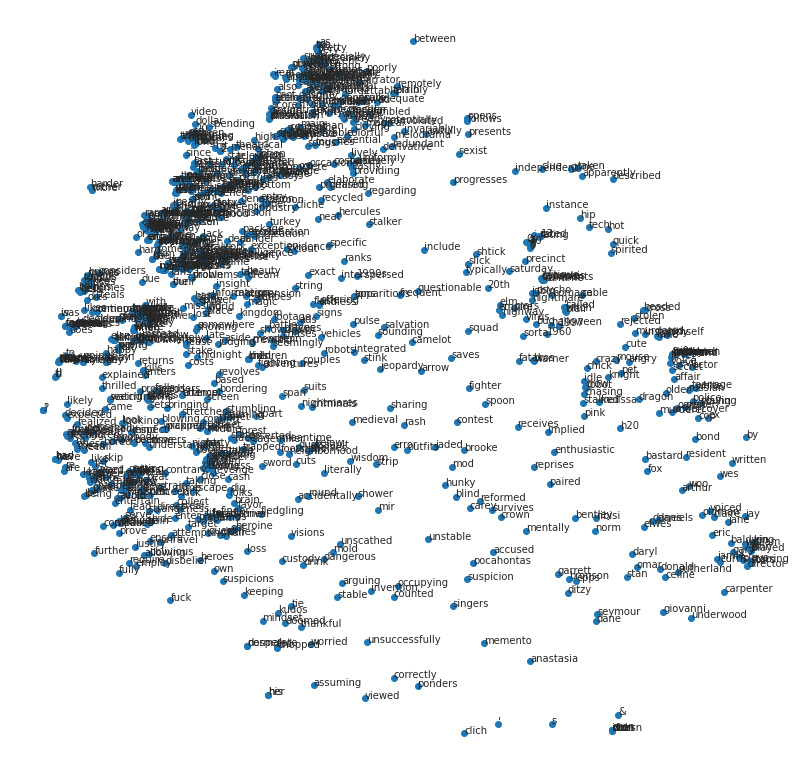

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000['x'], review_1000['y'])
for word, pos in review_1000.iterrows():
  ax.annotate(word, pos)
ax.axis('off')

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

#!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
# mpl.font_manager.rebuild()

In [17]:
!wget = nc http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

--2023-02-07 20:34:35--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-02-07 20:34:35--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2023-02-07 20:34:36--  http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt [following]
--2023-02-07 20:34:37--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462880

In [18]:
import codecs

def read_data(filename):
  with codecs.open(filename, encoding='utf-8', mode='r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
  return data

train_data = read_data('ratings_train.txt')

In [20]:
# !pip install konlpy

In [21]:
from konlpy.tag import Okt
tagger = Okt()

def tokenize(doc):
  return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

train_docs = [row[1] for row in train_data]
train_docs

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [22]:
sentences = [tokenize(d) for d in train_docs]

In [23]:
from gensim.models import word2vec

In [24]:
sentences[:5]

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 ['흠/Noun',
  '.../Punctuation',
  '포스터/Noun',
  '보고/Noun',
  '초딩/Noun',
  '영화/Noun',
  '줄/Noun',
  '..../Punctuation',
  '오버/Noun',
  '연기/Noun',
  '조차/Josa',
  '가볍다/Adjective',
  '않다/Verb'],
 ['너/Modifier',
  '무재/Noun',
  '밓었/Noun',
  '다그/Noun',
  '래서/Noun',
  '보다/Verb',
  '추천/Noun',
  '한/Josa',
  '다/Adverb'],
 ['교도소/Noun',
  '이야기/Noun',
  '구먼/Noun',
  '../Punctuation',
  '솔직하다/Adjective',
  '재미/Noun',
  '는/Josa',
  '없다/Adjective',
  '../Punctuation',
  '평점/Noun',
  '조정/Noun'],
 ['사이/Modifier',
  '몬페/Noun',
  '그/Determiner',
  '의/Noun',
  '익살스럽다/Adjective',
  '연기/Noun',
  '가/Josa',
  '돋보이다/Verb',
  '영화/Noun',
  '!/Punctuation',
  '스파이더맨/Noun',
  '에서/Josa',
  '늙다/Verb',
  '보이다/Verb',
  '하다/Verb',
  '커스틴/Noun',
  '던스트/Noun',
  '가/Josa',
  '너무나도/Adverb',
  '이쁘다/Adjective',
  '보이다/Verb']]

In [25]:
model = word2vec.Word2Vec(sentences)
model.init_sims(replace=True)

In [26]:
tokenize(u'배우 감독')

['배우/Noun', '감독/Noun']

In [29]:
model.wv.similarity(*tokenize(u'배우 감독'))

0.25131977

In [28]:
model.wv.similarity(*tokenize(u'남자 여자'))

0.9231665